# **Lab5.1 : CNN Feature maps**

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import torch
from torch import nn
import torchvision
import torchvision.models as models
import torchvision.transforms as transforms

## Get VGG16 Pretrained model
Explore the VGG16 achitecture.
<details>
<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

```
VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (17): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (18): ReLU(inplace=True)
    (19): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (20): ReLU(inplace=True)
    (21): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (22): ReLU(inplace=True)
    (23): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (24): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (25): ReLU(inplace=True)
    (26): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (27): ReLU(inplace=True)
    (28): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (29): ReLU(inplace=True)
    (30): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(7, 7))
  (classifier): Sequential(
    (0): Linear(in_features=25088, out_features=4096, bias=True)
    (1): ReLU(inplace=True)
    (2): Dropout(p=0.5, inplace=False)
    (3): Linear(in_features=4096, out_features=4096, bias=True)
    (4): ReLU(inplace=True)
    (5): Dropout(p=0.5, inplace=False)
    (6): Linear(in_features=4096, out_features=1000, bias=True)
  )
)
```

</details>


In [ ]:
### START CODE HERE ###
# models.vgg16(pretrained=True) เป็นการเรียกใช้โมเดล VGG16
# ที่ได้ฝึกฝนแล้วบนชุดข้อมูล ImageNet เพื่อให้สามารถนำไปใช้งานต่อได้ทันที
vgg16 = models.vgg16(pretrained=True)
print(vgg16)
### END CODE HERE ###

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:06<00:00, 84.5MB/s]


VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

Explore all layers in feature extractor part.
[Read more.](https://pytorch.org/docs/stable/generated/torch.nn.Module.html#torch.nn.Module.named_modules:~:text=named_modules(memo%3DNone%2C%20prefix%3D%27%27%2C%20remove_duplicate%3DTrue))


<details>
<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

```
-------------------
0:Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
-------------------
1:ReLU(inplace=True)
-------------------
2:Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
-------------------
3:ReLU(inplace=True)
-------------------
4:MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
...
28:Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
-------------------
29:ReLU(inplace=True)
-------------------
30:MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
```

</details>


In [ ]:
### START CODE HERE ###
feature = vgg16.features
for i, layer in enumerate(feature):
  print('-' * 90)
  print("{} : {}".format(i, layer))
### END CODE HERE ###

------------------------------------------------------------------------------------------
0 : Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
------------------------------------------------------------------------------------------
1 : ReLU(inplace=True)
------------------------------------------------------------------------------------------
2 : Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
------------------------------------------------------------------------------------------
3 : ReLU(inplace=True)
------------------------------------------------------------------------------------------
4 : MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
------------------------------------------------------------------------------------------
5 : Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
------------------------------------------------------------------------------------------
6 : ReLU(inplace=True)
-----

Examine weight and bias of first Convolution layer and ReLU layer. [Read more.](https://pytorch.org/tutorials/beginner/introyt/modelsyt_tutorial.html)
<details>
<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

```
torch.Size([64, 3, 3, 3])
Kernel : 0
*************************************
Channel : 0
[[-0.5537306   0.1427047   0.5289615 ]
 [-0.58312404  0.35655147  0.76566225]
 [-0.69022113 -0.04801885  0.48409155]]
Min coefficients -0.69022113
-------------------------------------
Channel : 1
[[ 0.17548391  0.00986297 -0.08141315]
 [ 0.04408892 -0.07032251 -0.26035076]
 [ 0.13239175 -0.1727862  -0.1322633 ]]
Min coefficients -0.26035076
-------------------------------------
Channel : 2
[[ 0.31302562 -0.1659134  -0.42752257]
 [ 0.47518674 -0.08267727 -0.48699915]
 [ 0.63202524  0.01930757 -0.2775303 ]]
Min coefficients -0.48699915
-------------------------------------


Kernel : 1
*************************************
Channel : 0
[[ 0.23253721  0.12665984  0.1860546 ]
 [-0.42805314 -0.24348575  0.24628444]
 [-0.2506616   0.14177004 -0.0054864 ]]
Min coefficients -0.42805314
-------------------------------------
Channel : 1
[[-0.14076217 -0.21902554  0.15040672]
 [-0.84126675 -0.3517562   0.5639763 ]
 [-0.24194452  0.5192758   0.5391499 ]]
Min coefficients -0.84126675
-------------------------------------
Channel : 2
[[-0.31432396 -0.37047786 -0.13093661]
 [-0.47144184 -0.15503426  0.3458899 ]
 [ 0.05438393  0.5868277   0.49579924]]
Min coefficients -0.47144184
-------------------------------------

...
```

</details>

In [ ]:
### START CODE HERE ###

# first_conv =  first layer in vgg16
first_conv = vgg16.features[0] # conv2D
first_relu = vgg16.features[1] # ReLu

# ดึง weight ของ first_conv ใน first layer ของ model vgg16
conv_weights = first_conv.weight.data
print(conv_weights.shape) # // torch.Size([64, 3, 3, 3]) -> 1 layer (64 feature, 3 channels, kernel size (3*3))
for feature_idx in range(conv_weights.shape[0]):
  if feature_idx <=3 : # 64 feature
    print(f"Kernel : {feature_idx}")
    print("*************************************")
    for channel_idx in range(conv_weights.shape[1]): # 3 channels
      channel_weights = conv_weights[feature_idx][channel_idx].numpy()
      print(f"Channel : {channel_idx}")
      print(channel_weights)
      print(f"Min coefficients {channel_weights.min()}")
      print("-------------------------------------")
    print("\n\n")
### END CODE HERE ###

torch.Size([64, 3, 3, 3])
Kernel : 0
*************************************
Channel : 0
[[-0.5537306   0.1427047   0.5289615 ]
 [-0.58312404  0.35655147  0.76566225]
 [-0.69022113 -0.04801885  0.48409155]]
Min coefficients -0.6902211308479309
-------------------------------------
Channel : 1
[[ 0.17548391  0.00986297 -0.08141315]
 [ 0.04408892 -0.07032251 -0.26035076]
 [ 0.13239175 -0.1727862  -0.1322633 ]]
Min coefficients -0.26035076379776
-------------------------------------
Channel : 2
[[ 0.31302562 -0.1659134  -0.42752257]
 [ 0.47518674 -0.08267727 -0.48699915]
 [ 0.63202524  0.01930757 -0.2775303 ]]
Min coefficients -0.48699915409088135
-------------------------------------



Kernel : 1
*************************************
Channel : 0
[[ 0.23253721  0.12665984  0.1860546 ]
 [-0.42805314 -0.24348575  0.24628444]
 [-0.2506616   0.14177004 -0.0054864 ]]
Min coefficients -0.4280531406402588
-------------------------------------
Channel : 1
[[-0.14076217 -0.21902554  0.15040672]
 [-

In [ ]:
assert isinstance(first_conv, nn.Conv2d), "First layer should be a convolutional layer"
assert isinstance(first_relu, nn.ReLU), "Second layer should be a ReLU activation"
assert first_conv.weight.shape == (64, 3, 3, 3), "First layer weight shape should be (64, 3, 3, 3)"

Examine Biases
<details>
<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

```
Bias : Parameter containing:
tensor([ 0.4034,  0.3778,  0.4644, -0.3228,  0.3940, -0.3953,  0.3951, -0.5496,
         ...
         0.2300,  0.4979,  0.5553,  0.5230, -0.2182,  0.0117, -0.5516,  0.2108],
       requires_grad=True)
```

</details>

In [ ]:
### START CODE HERE ###
# find bias in each feature in layer 1 (64 feature)
print("Bias :",first_conv.bias)
### END CODE HERE ###

Bias : Parameter containing:
tensor([ 0.4034,  0.3778,  0.4644, -0.3228,  0.3940, -0.3953,  0.3951, -0.5496,
         0.2693, -0.7602, -0.3508,  0.2334, -1.3239, -0.1694,  0.3938, -0.1026,
         0.0460, -0.6995,  0.1549,  0.5628,  0.3011,  0.3425,  0.1073,  0.4651,
         0.1295,  0.0788, -0.0492, -0.5638,  0.1465, -0.3890, -0.0715,  0.0649,
         0.2768,  0.3279,  0.5682, -1.2640, -0.8368, -0.9485,  0.1358,  0.2727,
         0.1841, -0.5325,  0.3507, -0.0827, -1.0248, -0.6912, -0.7711,  0.2612,
         0.4033, -0.4802, -0.3066,  0.5807, -1.3325,  0.4844, -0.8160,  0.2386,
         0.2300,  0.4979,  0.5553,  0.5230, -0.2182,  0.0117, -0.5516,  0.2108],
       requires_grad=True)


## Process the feature maps
<details>
<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical

![image.png](attachment:image.png)

</details>

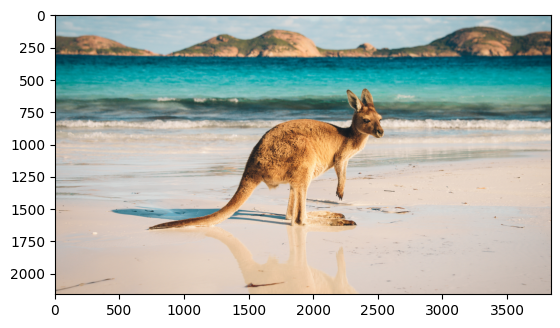

In [ ]:
### START CODE HERE ###
img = cv2.imread("/content/133652190061450902.jpg")
img = img[:, :, ::-1]
plt.imshow(img)
### END CODE HERE ###

Normalize the image using the mean and standard deviation values from the [VGG16 normalization parameters.](https://pytorch.org/vision/main/models/generated/torchvision.models.vgg16.html)
<details>
<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical

![image.png](attachment:image.png)

</details>

-2.1179039301310043 2.253501410995211


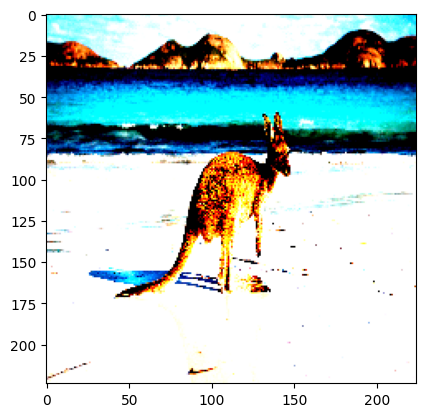

In [ ]:
### START CODE HERE ###
#   -- norm เพื่อ --
# - ลดความแปรปรวนของข้อมูล
# - train model ได้เร็วยึ่งขึ้น
# - รักษา scale ของข้อมูล
# - ป้องกันการ overfiting

## norm : (original data - mean)/sd : img_norm -> (อยู่ในรูป normal distribution [-3, 3])
# resize (224, 224)
# scale image [0 -> 1]
# mean = [0.485, 0.456, 0.406]
# std = [0.229, 0.224, 0.225]

weights = models.VGG16_Weights.IMAGENET1K_V1
mean = weights.transforms().mean
std = weights.transforms().std

## resize image
img = cv2.resize(img,(224,224))
## scale image [0 - 1]
img_scale = img.astype(np.float32)/255.0

## ((img_scale - mean)/std) จะอยู่ในช่วง normal distribution [-3, 3]
img_norm = ((img_scale - mean)/std)
print(img_norm.min(), img_norm.max())

## img_rescale
img = img_norm*255
img = np.clip(img, 0, 255).astype(np.uint8)
plt.imshow(img)
### END CODE HERE ###

Convert the [NumPy image to a PyTorch tensor](https://pytorch.org/docs/stable/torch.html#:~:text=memory%2Dmapped%20file.-,from_numpy,-Creates%20a%20Tensor), ensuring it has the [correct dimensions and data type](https://pytorch.org/vision/main/models/generated/torchvision.models.vgg16.html) for input to the first convolution layer.

In [ ]:
### START CODE HERE ###
## นำ image ที่ผ่านการ normalize image แล้วนั้นแปลงเป็น tensor เพื่อใช้ในการพัฒนา model ต่อไป
## condition
# 1. แปลงจาก np array -> pytorch tensor
# 2. pytorch ต้องการ (C, H, W) แปลงโดยใช้ .permute
# 3.convo layer ต้องการ datatype แบบ torch.float32

# numpy array -> tensor
img_tensor = torch.from_numpy(img)

# channel last (H, W, C) -> channel first (C, H, W)
img_tensor = img_tensor.permute(2, 0, 1)

# convert datatype to float32
img_tensor = img_tensor.float()
print(img_tensor.shape)
### END CODE HERE ###

torch.Size([3, 224, 224])


Complete the function below. <br>
The plot_featuremap function takes a set of feature maps and creates a grid of subplots, each displaying a single feature map.

In [ ]:
### START CODE HERE ###
def plot_featuremap(img_feature, title):
  fig, axs = plt.subplots(8, 8, figsize = (15, 15))
  fig.suptitle(title)
  for i, img in enumerate(img_feature):
    row = i //8
    col = i % 8
    axs[row, col].set_title(i+1)
    axs[row, col].imshow(img, cmap="gray")
    axs[row, col].axis("off")
  plt.tight_layout()
  plt.show()
### END CODE HERE ###

Pass the image to the first convolutional layer and display the feature map output using your `plot_featuremap()` function.
<details>
<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical

![image.png](attachment:image.png)
</details>

torch.Size([64, 224, 224])


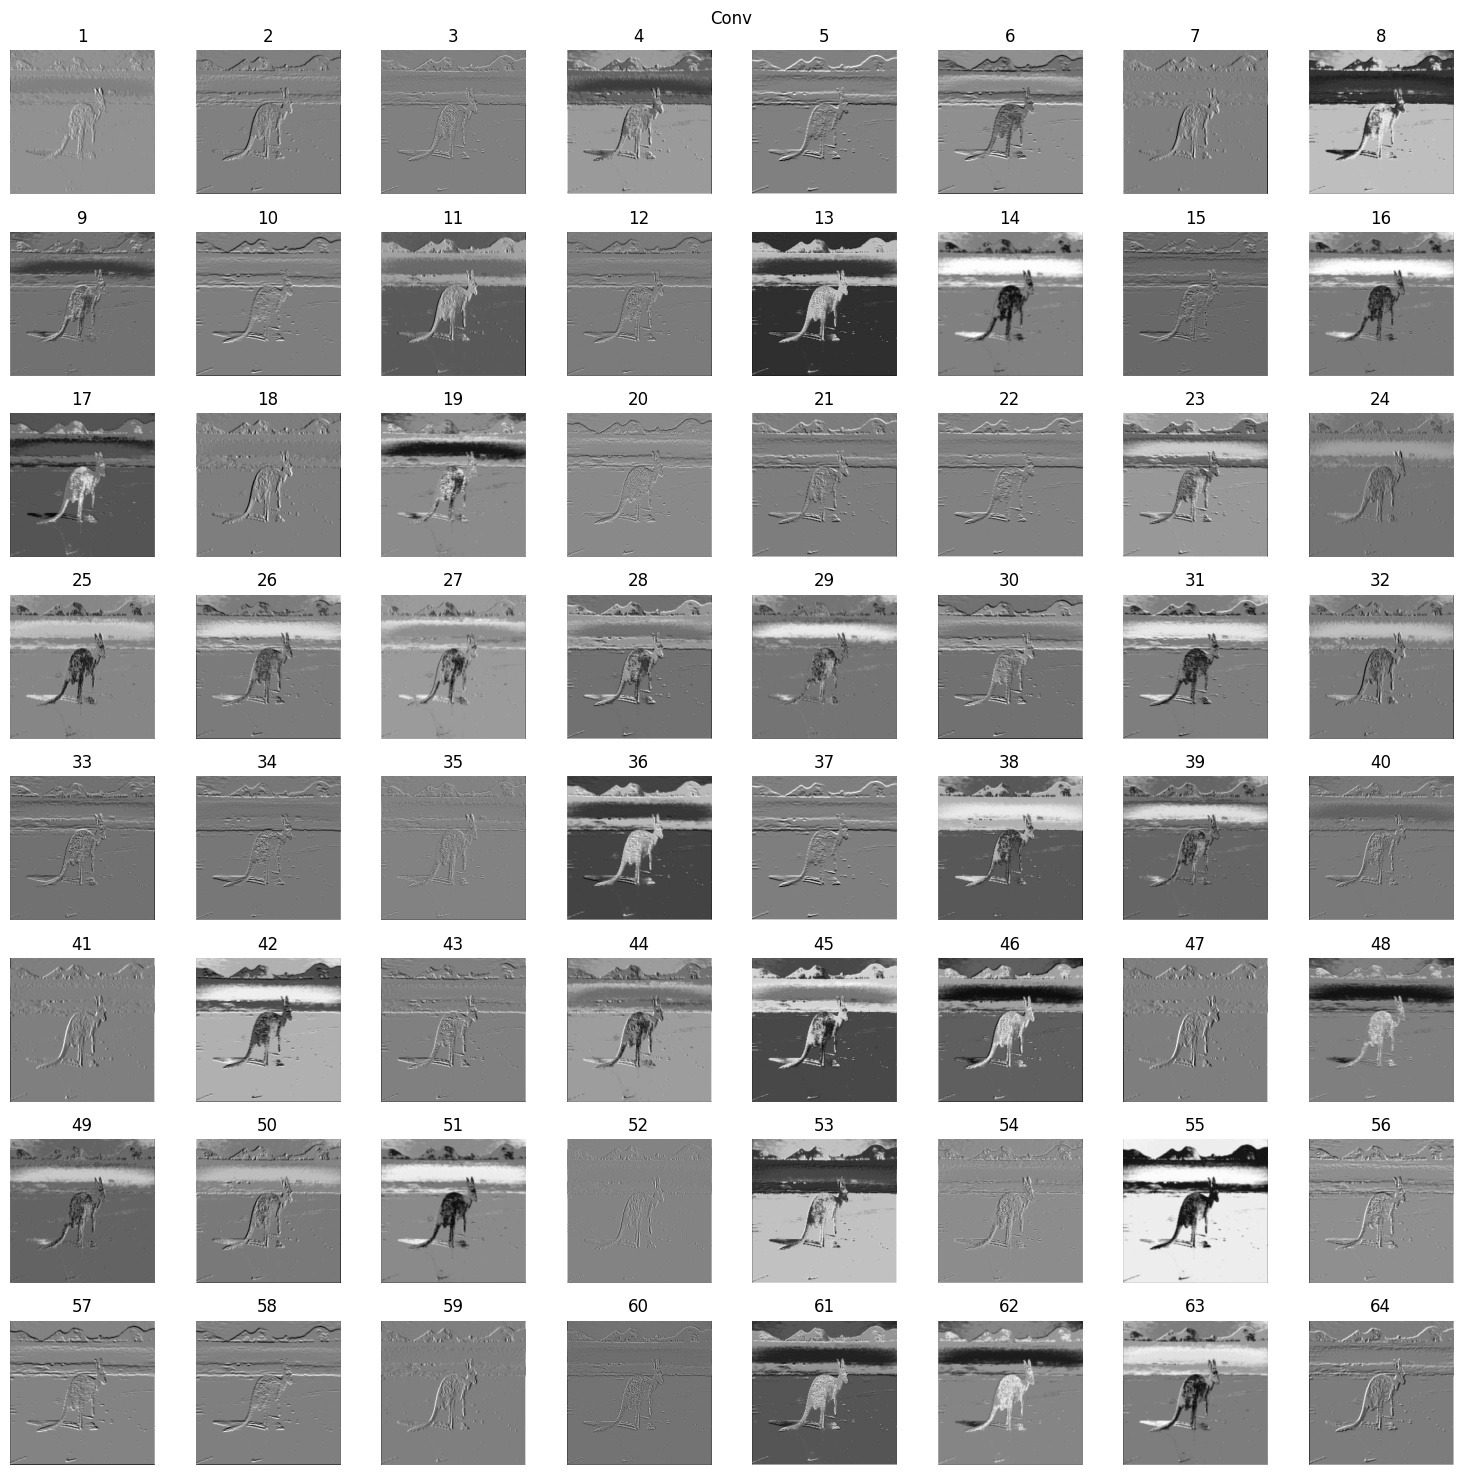

In [ ]:
### START CODE HERE ###
# นำ tensor img ใส่เข้าไปใน layer ที่เราดึงออกมาใน model --> first_layer(img_tensor)
# โดยผลลัพท์ที่ได้จะเป็นรูปภาพทั้งหมด 64 ภาพที่ถูก convo แล้วนั่นเอง (จำนวนภาพได้ตาม feature ที่มีใน layer นั้นๆ)
feature_conv = first_conv(img_tensor)
print(feature_conv.shape)

# ก่อนจะนำรูปเอาไป plot นั้นจะต้องปลดความเป็น tensor ก่อนเข้าใช้ฟังก์ชั่นใน mathplotlib
plot_featuremap(feature_conv.detach().numpy(), "Conv")
### END CODE HERE ###

Pass the image to the first ReLU layer and display the feature map output using your `plot_featuremap()` function.
<details>
<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical

![image.png](attachment:image.png)

</details>

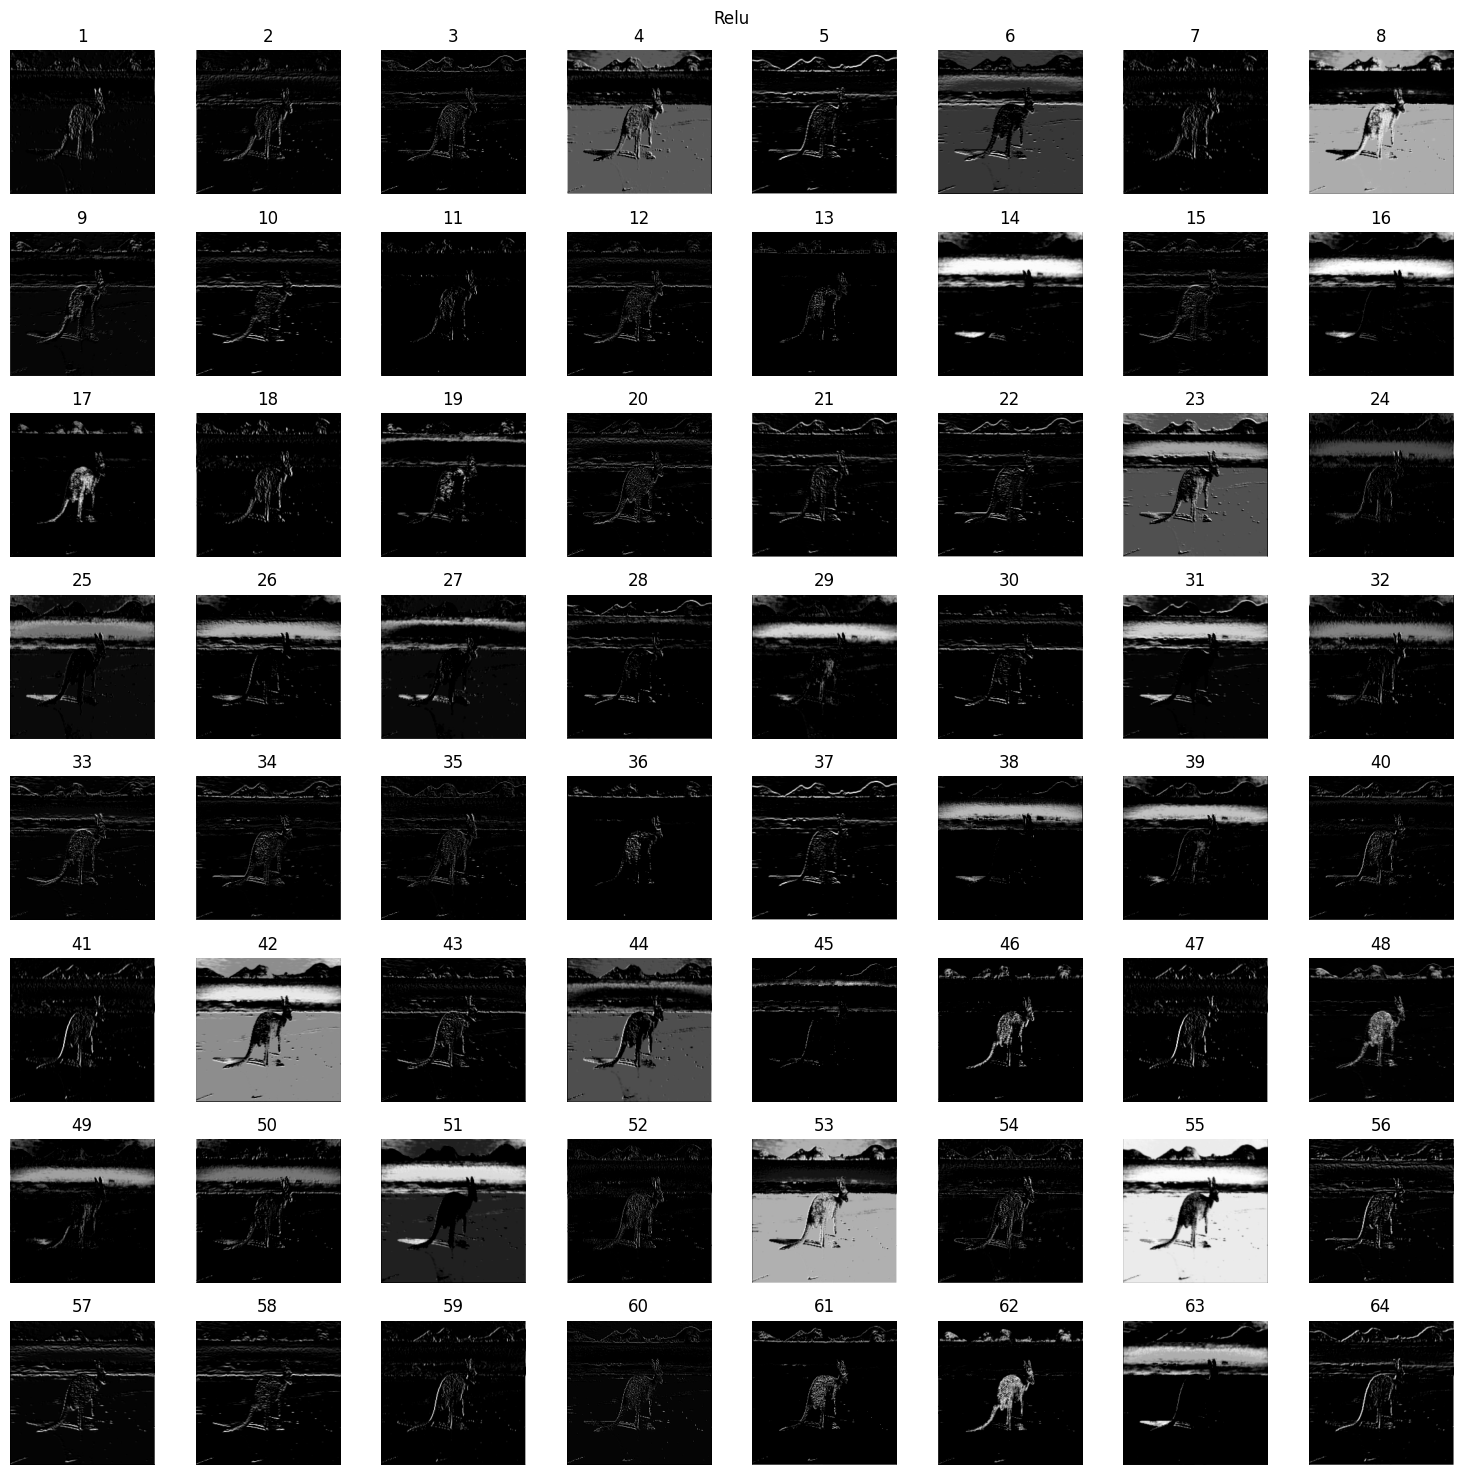

In [ ]:
### START CODE HERE ###
# นำ feature ที่ได้หลังจากการทำ convo เข้า relu layer ต่อไป โดยใช้ function
feature_relu = first_relu(feature_conv)
plot_featuremap(feature_relu.detach().numpy(), "Relu")
### END CODE HERE ###

## Convolution 2D from scratch
Complete the function below

In [ ]:
### START CODE HERE ###
def convolution2d(img,kernel,padding = 1,stride = 1):
  # ปลดความเป็น tensor ให้เป็น numpy array
  img = img.detach().numpy()
  kernel = kernel.detach().numpy()
  # extract shape
  img_h, img_w = img.shape
  kernel_h, kernel_w = kernel.shape

  # set output dimensions after conv (เมื่อมี padding และ stride)
  out_h = (img_h + (2 * padding) - kernel_h) // stride + 1
  out_w = (img_w + (2 * padding) - kernel_w) // stride + 1

  # add padding
  img_padded = np.pad(img, [(padding, padding), (padding, padding)], mode='constant')

  # create np.array by np.zero for output
  output = np.zeros((out_h, out_w))

  # Perform the convolution operation
  for y in range(out_h):
      for x in range(out_w):
          start_y = y * stride
          end_y = start_y + kernel_h
          start_x = x * stride
          end_x = start_x + kernel_w

          region = img_padded[start_y:end_y, start_x:end_x]
          output[y, x] = np.sum(region * kernel)
  return output
### END CODE HERE ###

Copy the weights and biases from `vgg16` and then use each kernel perform a 2D convolution using `convolution2d` and display the resulting feature map
<details>
<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical

![image.png](attachment:image.png)

</details>

torch.Size([3, 224, 224])
torch.Size([224, 224])
(64, 224, 224)


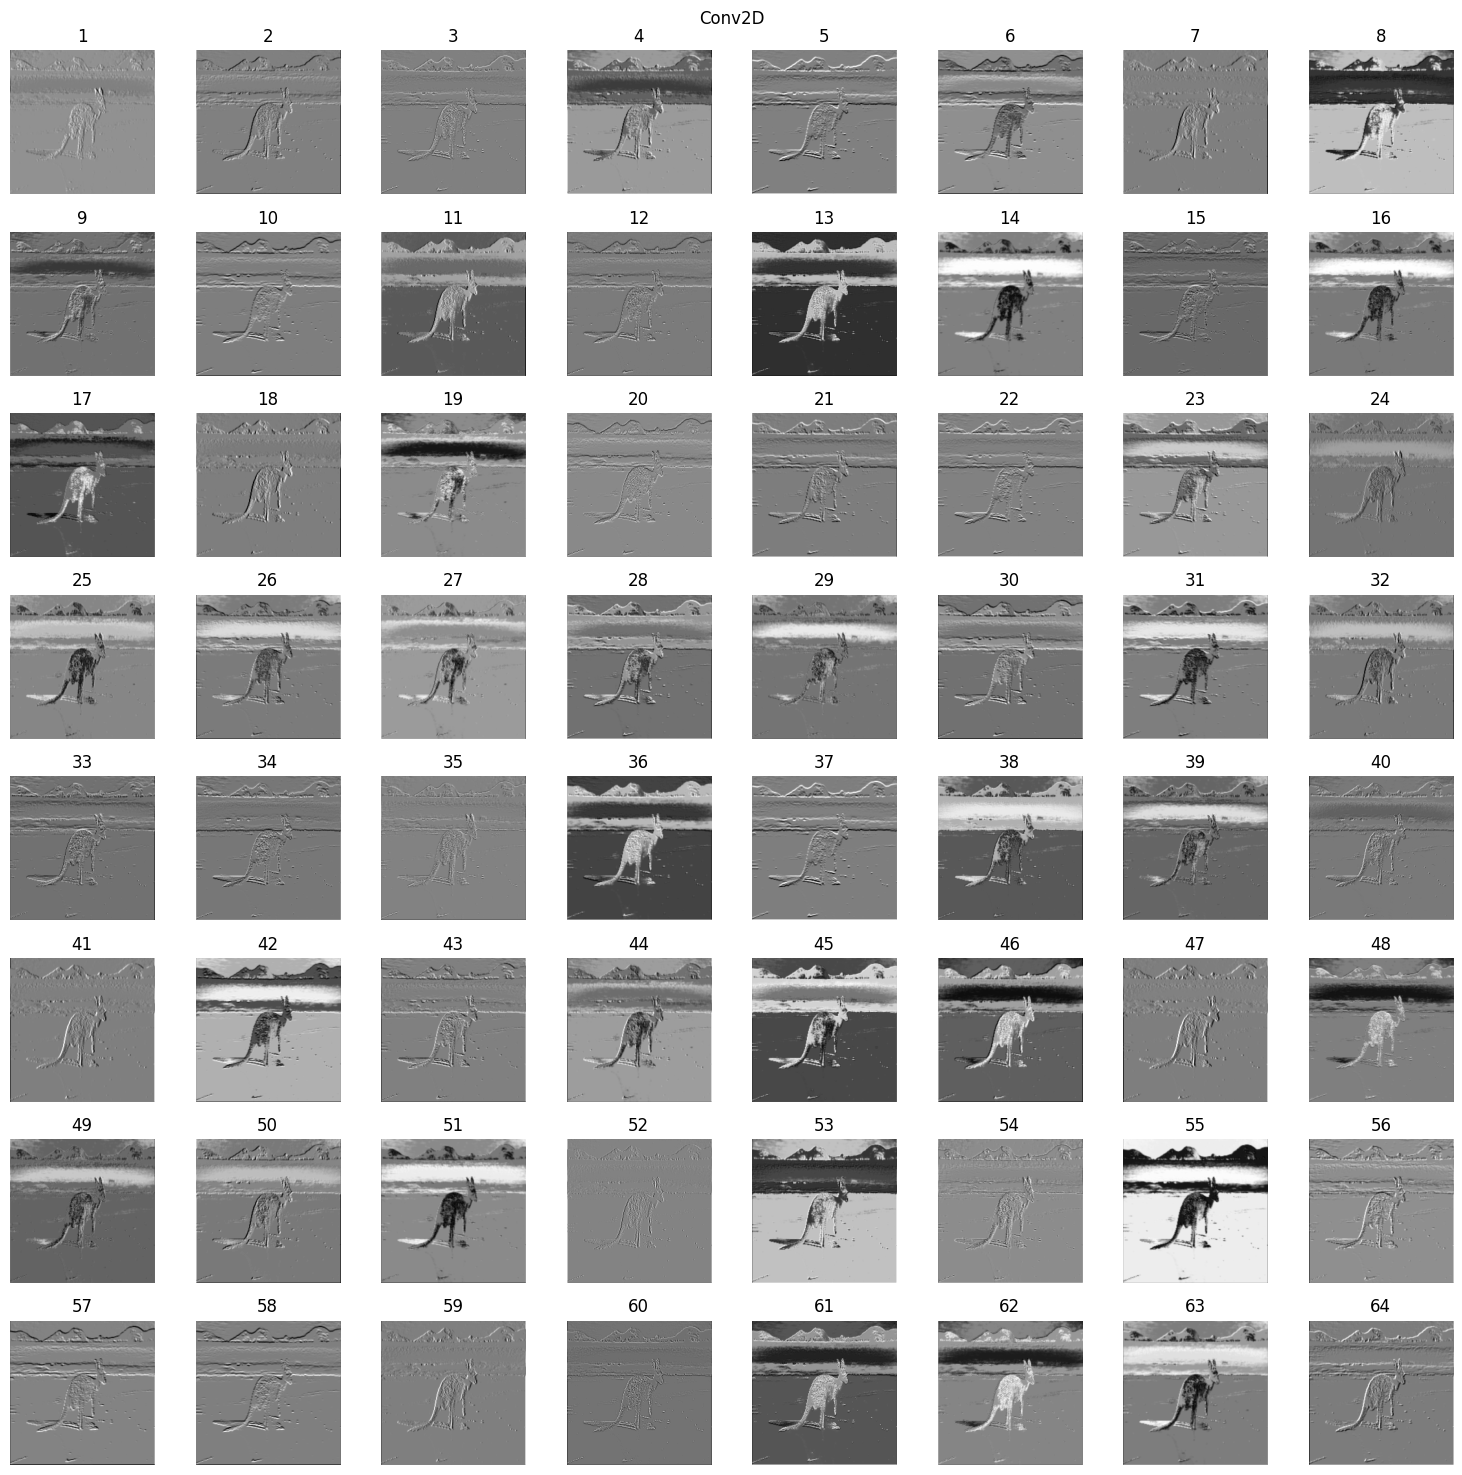

In [ ]:
### START CODE HERE ###
# set image and convo layer (array structure)
conv_weights = first_conv.weight.data
print(img_tensor.shape)
print(img_tensor[0, :, :].shape)
# set array structure for output
output = np.zeros_like(img_tensor[0])

# set bias
bias = first_conv.bias.detach().numpy()

# list ของ ที่เก็บผลลัพท์จากการทำ convo ในแต่ละ feature
feature_conv = []

# // torch.Size([64, 3, 3, 3]) -> 1 layer (64 feature, 3 channels, kernel size (3*3))
# ดึง weight แต่ละ feature ใน layer 1
for i in range(conv_weights.shape[0]):
  for ch in range(3):
    kernel = conv_weights[i][ch]  # i : คือลำดับ feature , ch : chanel
    output += convolution2d(img_tensor[ch], kernel, padding=1, stride=1)
  feature_conv.append(output+bias[i])
  output = np.zeros_like(img_tensor[0])
print(np.array(feature_conv).shape)
plot_featuremap(feature_conv, "Conv2D")
### END CODE HERE ###

After performing the `convolution2d` operation, apply the ReLU activation function to the output. Then, display the resulting feature map.
<details>
<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical

![image.png](attachment:image.png)

</details>

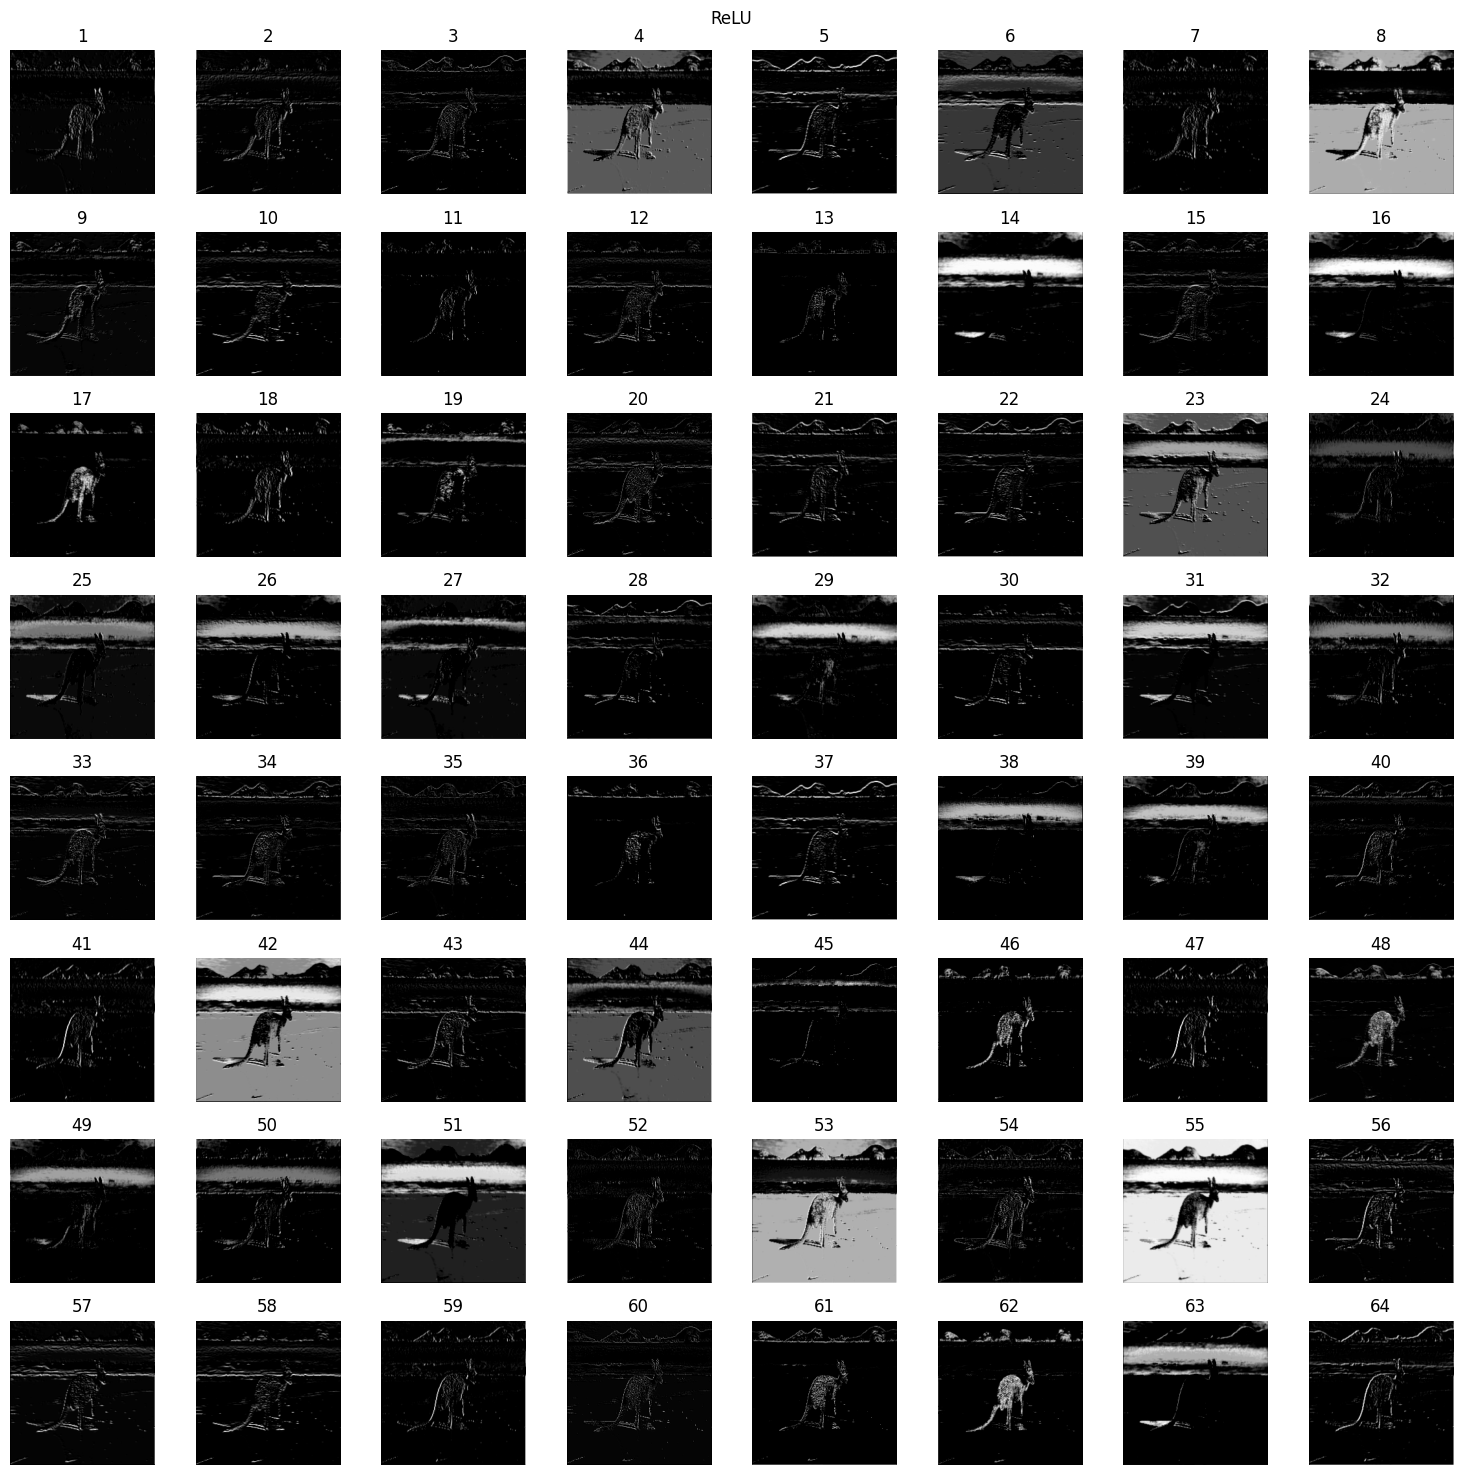

In [ ]:
### START CODE HERE ###
feature_ReLU = np.maximum(feature_conv, 0)
plot_featuremap(feature_ReLU,'ReLU')
### END CODE HERE ###

---

# Question
1. Show the array of kernel weights used for extracting object color
and those used for extracting object edge details at least two CNN nodes.
Compare and Discuss how the specific values of these kernel weights influence the CNN's ability to detect colors versus edges in images.</br>
เปรียบเทียบระหว่าง feature ที่ 5 สำหรับ edge detection และ feature ที่ 42 สำหรับ color detection ใน layer ที่ 1 โดยได้ values ภายใน kernel ทั้ง 2 ได้ดังรูป </br>
<b>1. edge detection : </b></br>
        [[[ 0.3127,  0.5604, -0.1287],
         [ 0.0051, -0.0295, -0.0401],
         [-0.1780, -0.3504, -0.1786]],

        [[ 0.7214,  1.0734,  0.0560],
         [-0.0414, -0.1132, -0.2101],
         [-0.4246, -0.6733, -0.3867]],

        [[ 0.3684,  0.6584,  0.0165],
         [-0.0054,  0.0235, -0.0079],
         [-0.3082, -0.4529, -0.2611]]]
<b>2. color detection : </b>
        [[[-0.1624, -0.1579, -0.1354],
         [-0.0908, -0.0318, -0.0535],
         [ 0.0585,  0.0788,  0.0424]],

        [[ 0.0110,  0.0256, -0.0018],
         [ 0.1210,  0.2638,  0.1218],
         [ 0.1862,  0.2240,  0.0960]],

        [[-0.0536,  0.0036, -0.0304],
         [ 0.0072,  0.1647,  0.0483],
         [-0.0100,  0.0256, -0.0349]]]

----
2. Why is Matplotlib able to display the output feature map from the convolution layer, even though it contains negative values? <br>
<b> ANS </b>
Mathplotlib นั้นสามารถแสดงค่าที่มีค่าติดลบได้เพราะค่า pixel ที่จะได้รับการ display นั้นจะถูก normalize ทำให้ไม่ว่าค่าใดก็ตามที่อยู่นอกช่วง [0, 255] จะถูก normalize ให้อยู่ในช่วง [0, 255] ได้นั่นเอง
----
3. Is there a method faster than traditional 2D convolution in the "Convolution 2D from scratch" section? </br>
มี เช่น FFT convolution, Sparse Convolutions

In [ ]:
conv_weights = first_conv.weight.data
print("Edge detection")
print(conv_weights[4]) ##edge
print("-----------------")
print("Color detection")
print(conv_weights[41]) ##color

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
array = np.random.rand(4, 4)  # 3x4 array with random floats between 0 and 1
print(array)
feature_map = (array*(400))
print(feature_map)

img = cv2.imread('/content/133652190061450902.jpg')
print(img.min(), img.max())

# feature_map = np.array([
#     [-1.5, -0.5, 0.0],
#     [-0.5, -1.0, -2.5],
#     [-1.0, 0.0, -3.0]
# ])
# feature_map = np.clip(feature_map, 0, 255)
plt.imshow(feature_map, cmap="gray", vmin=0, vmax=255)
plt.show()
plt.imshow(feature_map, cmap="gray")

# plt.colorbar()
plt.show()